In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [9]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
selected_columns = train_df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']] #slecting columns and saving them in a new DataFrame

In [19]:
print(selected_columns)

     Survived  Pclass     Sex   Age     Fare
0           0       3    male  22.0   7.2500
1           1       1  female  38.0  71.2833
2           1       3  female  26.0   7.9250
3           1       1  female  35.0  53.1000
4           0       3    male  35.0   8.0500
..        ...     ...     ...   ...      ...
886         0       2    male  27.0  13.0000
887         1       1  female  19.0  30.0000
888         0       3  female   NaN  23.4500
889         1       1    male  26.0  30.0000
890         0       3    male  32.0   7.7500

[891 rows x 5 columns]


In [17]:
age_greater_than_30 = train_df[train_df['Age'] > 30] #selecting rows where 'Age' is greater than 30 using boolean indexing

In [21]:
print(age_greater_than_30)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
4              5         0       3   
6              7         0       1   
11            12         1       1   
..           ...       ...     ...   
873          874         0       3   
879          880         1       1   
881          882         0       3   
885          886         0       3   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [22]:
columns_missing = train_df.columns[train_df.isnull().any()] #this return a serie with a true or false value for each column

In [23]:
print (columns_missing)

Index(['Age', 'Cabin', 'Embarked'], dtype='object')


In [24]:
median_age = train_df['Age'].median() #filling missing values in the 'Age' column with the median age

In [25]:
train_df['Age'].fillna(median_age, inplace=True) #using fillna to replace null values

In [28]:
num_duplicate_rows = train_df.duplicated().sum()

In [32]:
print(num_duplicate_rows)

0


In [33]:
def categorize_age(age):         #dding a new column 'Age_group' to categorize passengers
    if age <= 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

train_df['Age_group'] = train_df['Age'].apply(categorize_age)

In [34]:
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age_group  
0      0         A/5 21171   7.2500   NaN        S     Adult  
1      0          PC 17599  71.2833   C85        C     Adult  
2      0  STON/O2. 3101282   7.9250   NaN        S     Adult  
3      0            113803  53.1000  C123        S     Adult  
4    

In [35]:
average_pclass = train_df.groupby('Pclass').agg({'Fare': 'mean', 'Age': 'mean'}) #Using groupby to find average 'Fare' and 'Age' for each 'Pclass'

In [36]:
print (average_pclass)

             Fare        Age
Pclass                      
1       84.154687  36.812130
2       20.662183  29.765380
3       13.675550  25.932627


In [43]:
train_df = pd.merge(train_df, average_pclass, on='Pclass', suffixes=('_avg_fare', '_avg_age')) #Merging the grouped data with the original DataFrame

In [45]:
print(train_df.head())

   PassengerId  Survived  Pclass                            Name     Sex  \
0            1         0       3         Braund, Mr. Owen Harris    male   
1            3         1       3          Heikkinen, Miss. Laina  female   
2            5         0       3        Allen, Mr. William Henry    male   
3            6         0       3                Moran, Mr. James    male   
4            8         0       3  Palsson, Master. Gosta Leonard    male   

   Age_avg_fare  SibSp  Parch            Ticket  Fare_avg_fare  ... Embarked  \
0          22.0      1      0         A/5 21171         7.2500  ...        S   
1          26.0      0      0  STON/O2. 3101282         7.9250  ...        S   
2          35.0      0      0            373450         8.0500  ...        S   
3          28.0      0      0            330877         8.4583  ...        Q   
4           2.0      3      1            349909        21.0750  ...        S   

  Age_group  Fare_avg_age  Age_avg_age  Fare_avg_fare  Age_avg

In [46]:
pivot_pclass_sex = pd.pivot_table(train_df, values='Fare', index='Pclass', columns='Sex', aggfunc=np.sum) #Creating a pivot table showing the total 'Fare' collected for each 'Pclass', separated by 'Sex'

In [47]:
print(pivot_pclass_sex)

Sex          female          male
Pclass                           
1       7910.540625  10266.871875
2       1570.325920   2231.515780
3       1969.279215   4745.415885


In [48]:
melted_df = pd.melt(train_df, id_vars=['Pclass', 'Sex', 'Age_group', 'Survived'], value_vars=['Fare'], var_name='Fare', value_name='Value')

In [49]:
print (melted_df)

     Pclass     Sex Age_group  Survived  Fare      Value
0         3    male     Adult         0  Fare  13.675550
1         3  female     Adult         1  Fare  13.675550
2         3    male     Adult         0  Fare  13.675550
3         3    male     Adult         0  Fare  13.675550
4         3    male     Child         0  Fare  13.675550
..      ...     ...       ...       ...   ...        ...
886       2  female     Adult         1  Fare  20.662183
887       2  female     Adult         1  Fare  20.662183
888       2  female     Adult         1  Fare  20.662183
889       2    male     Adult         0  Fare  20.662183
890       2    male     Adult         0  Fare  20.662183

[891 rows x 6 columns]


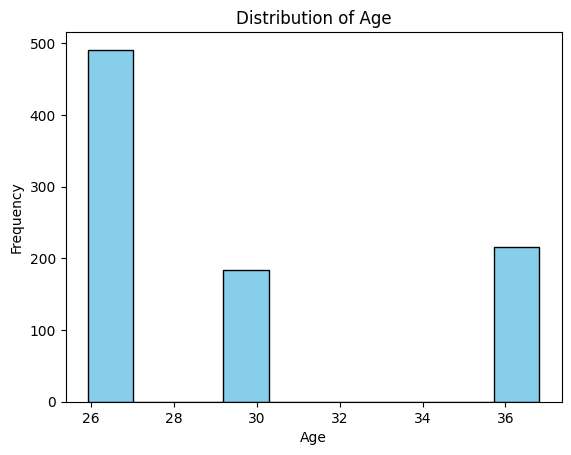

In [50]:
plt.figure
plt.subplot
plt.hist(train_df['Age'], color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

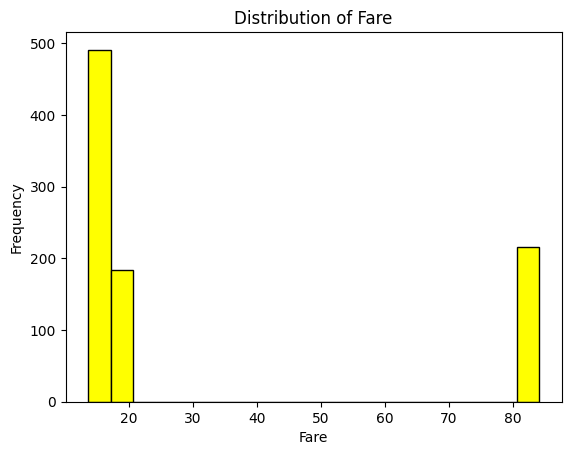

In [51]:
plt.figure
plt.subplot
plt.hist(train_df['Fare'], bins=20, color='yellow', edgecolor='black')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [57]:
survival_rate = train_df.groupby('Sex')['Survived'].mean()

In [58]:
print(survival_rate)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [59]:
survival_rate_pclass = train_df.groupby('Pclass')['Survived'].mean()

In [60]:
print(survival_rate_pclass)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
